In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

In [2]:
def I_3a(x):
    return 1/(1 + x*x)

In [3]:
def left_rectangle_method(f, a, b, n):
    h = (b - a) / n
    sum = f(a)
    for i in range(1, n):
        sum += f(a+h*i)
    return sum * h

In [4]:
def right_rectangle_method(f, a, b, n):
    h = (b - a) / n
    sum = f(a + h)
    for i in range(2, n + 1):
        sum += f(a+h*i)
    return sum * h

In [5]:
def trapezoid_method(f, a, b, n):
    h = (b - a) / n
    sum = f(a)/2
    for i in range(2, n):
        sum += f(a + h * i)
    sum += f(b)/2
    return sum * h

In [6]:
def mean_method(f, a, b, n):
    h = (b - a) / n
    sum = f((2*a + h) / 2)
    for i in range(1, n + 1):
        sum += f((a + h*i + h*(i+1) + a) / 2)
    return sum * h

In [7]:
def simpson_method(f, a, b, n):
    if n % 2 == 1: 
        n += 1
        
    integral = f(a) + f(b)
    h = (b - a) / n
    integral = f(a) + f(b) + 4 * sum(f(a + (i + 0.5) * h) for i in range(n)) + 2 * sum(f(a + i * h) for i in range(1, n))
    return h * integral / 6

In [8]:
def check_precision(f, a, b, N, method):
    integral = quad(f, a, b)
    errors = []
    
    for n in range(1,N):
        value_for_estimation = method(f, a, b, n)
        errors.append(np.abs(integral[0] - value_for_estimation))
    return errors

In [9]:
def draw_errors(N, method, f, a, b):
    plt.figure(figsize = (3,3))
    plt.plot(range(1,N), check_precision(f, a, b, N,method))
    plt.grid(True)
    plt.xlim(xmin=1)
    plt.show()

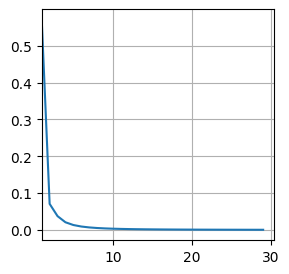

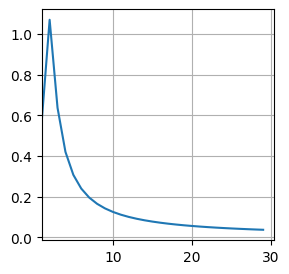

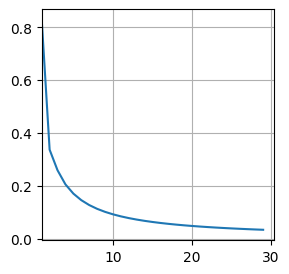

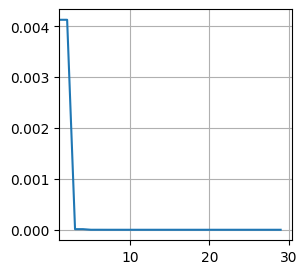

In [10]:
a = -1
b = 1
N = 30

methods = [right_rectangle_method, trapezoid_method, mean_method, simpson_method]

for method in methods:
    draw_errors(N,method, I_3a, a, b)

In [11]:
def erf(x):
    return (2 / np.sqrt(np.pi)) * quad(lambda t: np.exp(-t**2), 0, x)[0]

In [12]:
erf(1)

np.float64(0.8427007929497149)

In [13]:
def simpson_method(f, a, b, n, x):
    if n % 2 == 1: 
        n += 1
        
    integral = f(a,x) + f(b,x)
    h = (b - a) / n
    integral = f(a,x) + f(b,x) + 4 * sum(f(a + (i + 0.5) * h, x) for i in range(n)) + 2 * sum(f(a + i * h, x) for i in range(1, n))
    return h * integral / 6

In [14]:
def erf(x):
    return (2 / np.sqrt(np.pi)) *simpson_method(lambda t,x: np.exp(-t**2), 0, x, 1000000,1)

In [15]:
erf(1)

np.float64(0.8427007929497362)

In [16]:
def simpson_method(f, a, b, n, pp):
    if n % 2 == 1: 
        n += 1
        
    integral = f(a,pp) + f(b,pp)
    h =  np.float64((b - a) / n)
    integral = f(a,pp) + f(b,pp) + 4 * sum(f(a + (i + np.float64(0.5)) * h, pp) for i in range(n)) + 2 * sum(f(a + i * h, pp) for i in range(1, n))
    return h * integral / 6

In [17]:
def f(t,pp):
    return  np.float64((1/np.pi)*np.cos(pp[0] * t - pp[1] * np.sin(t)))


In [101]:
def J(m,x):
    return simpson_method(f, 0, np.pi, 9,(m,x))

In [102]:
def J_derivative(m, x, eps =  np.float64(10e-7)):
    return (J(m,x + eps) - J(m,x - eps))/(2*eps)
    

In [103]:
J(1,1)

np.float64(0.4400505857449339)

-8.798073380944516e-12 -0.4399036690472258


np.float64(0.99999999999)

In [38]:
x = np.linspace(0, 2*np.pi, 1000)
for i in x:
    print(J_derivative(0,i) + J(1,i))

1.743934249004316e-17
0.0031447218412654437
0.006289350384854289
0.00943379233616517
0.012577954406747952
0.01572174331737838
0.018865065801133247
0.022007828606464806
0.025149938500274683
0.028291302270986803
0.03143182673162048
0.03457141872286191
0.03770998511613446
0.04084743281666908
0.04398366876657201
0.04711859994789278
0.050252133385689235
0.05338417615109236
0.05651463536436905
0.05964341819798275
0.06277043187965343
0.06589558369541405
0.06901878099266624
0.07213993118323375
0.07525894174641294
0.07837572023202166
0.0814901742634455
0.08460221154068116
0.08771173984337756
0.09081866703387402
0.0939229010602358
0.09702434995928631
0.10012292185963644
0.10321852498471056
0.1063110676557699
0.10940045829493156
0.11248660542818446
0.11556941768840207
0.11864880381835109
0.12172467267369559
0.12479693322599927
0.12786549456572135
0.1309302659052101
0.13399115658169095
0.137048076060251
0.14010093393681947
0.14314963994114202
0.14619410393975252
0.14923423593893823
0.1522699460877

In [23]:
J_derivative(0,1) + J(1,1)

np.float64(-3.319344799024293e-12)